------------------------------------------------------------------------------------------------------------
Star Migration



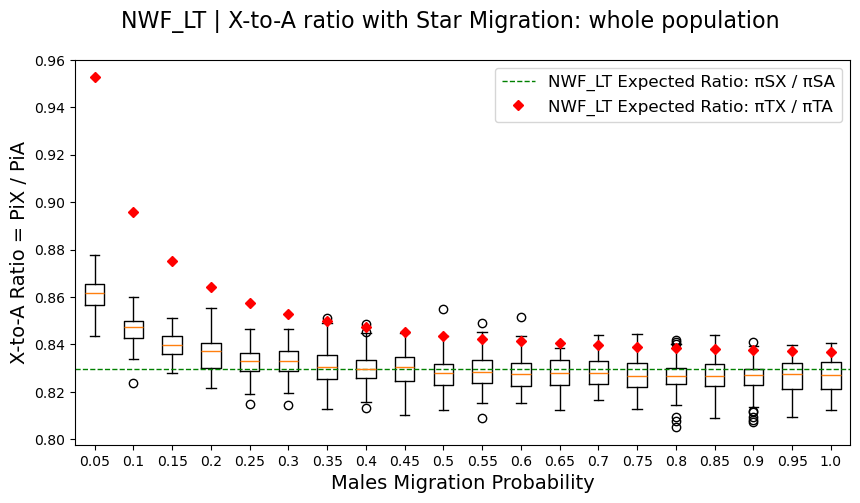

------------------------------------------------------------------------------------------------------------
Circle Migration



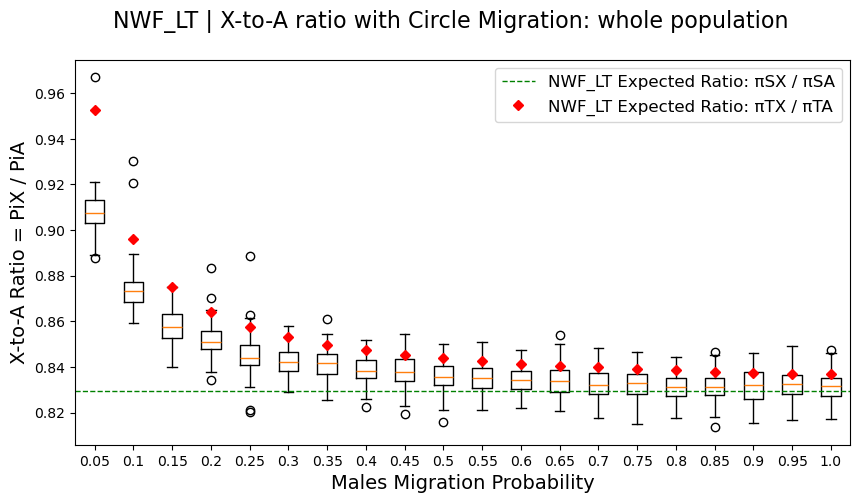

------------------------------------------------------------------------------------------------------------
StepStone Migration



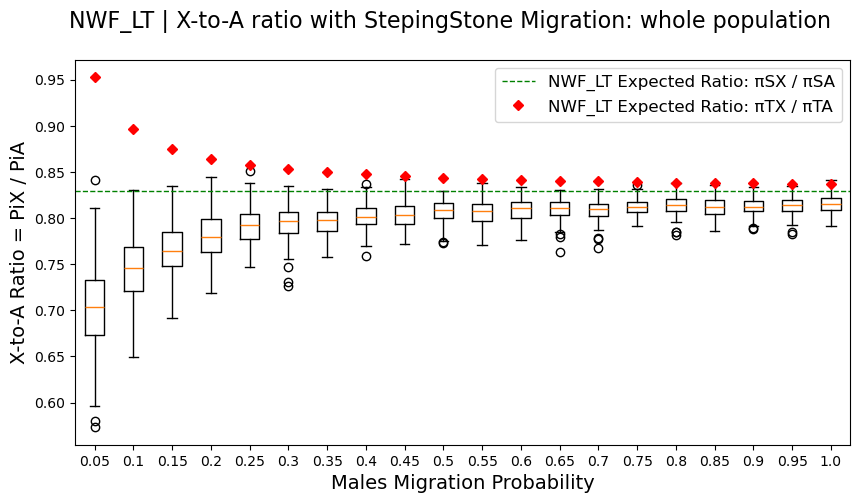

In [1]:
# Pi on whole population
import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_LifeTable/Migrations/NWFLT_MigV2/"
FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWF_LifeTable/Migrations/"

Prob_Mig = [k/20 for k in range(1,20)]+[1.0]
LRatio_star = [0 for k in range (len(Prob_Mig))]
LRatio_circle = [0 for k in range (len(Prob_Mig))]
LRatio_stepstone = [0 for k in range (len(Prob_Mig))]
counter = 0

expected_ratio = 0.75
#Ne = 4*500*(1-SR)*SR   # Ne = 4*Nm*Nf/N  => Ne = 4*N*(1-SR)*SR 
#expected_teta = round (4*Ne*1.25e-8,10)
n = 15
NeA = 50
NeX = 3/4 * NeA
mu = 40 * 1.25e-8
#Pi_SA = 4*n*NeA*mu
#Pi_SX = 4*n*NeX*mu
Pi_SA = 0.0007692
Pi_SX = 0.0006381
L_PiTX_PiTA = []
expected_ratio = Pi_SX / Pi_SA

for pmig in Prob_Mig:
    mA = 0 + 1/2 * (pmig+0)
    mX = 0 + 1/3 * (pmig+2*0)
    Pi_TA = Pi_SA*(1+((n-1)**2)/(4*mA*NeA*n**2))
    Pi_TX = Pi_SX*(1+((n-1)**2)/(4*mX*NeX*n**2))
    PiTX_PiTA = Pi_TX / Pi_TA
    L_PiTX_PiTA.append(PiTX_PiTA)
    
    Star = []
    Circle = []
    StepStone = []
    for NUM in range(1,501):
        File = FOLDER+"NWFLT_subpop_star_Mig"+str(pmig)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) > 0:
                Star.append(float(Values[1])/float(Values[0]))
            Text.close()
            
        File = FOLDER+"NWFLT_subpop_circle_Mig"+str(pmig)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) > 0:
                Circle.append(float(Values[1])/float(Values[0]))
            Text.close()

        File = FOLDER+"NWFLT_MigV2_stepstone"+str(pmig)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) > 0:
                StepStone.append(float(Values[1])/float(Values[0]))
            Text.close()

    LRatio_star[counter] = Star
    LRatio_circle[counter] = Circle
    LRatio_stepstone[counter] = StepStone
    counter += 1
    Star_median = np.median(Star)
    Circle_median = np.median(Circle)
    StepStone_median = np.median(StepStone)
    #print("------------------------------------------------------------------------------------------------------------")
    #print("Migration Probability = "+str(pmig))
    #print("Expected Ratio: ",expected_ratio)
    #print("Expected Ratio with Subpopulations: ",round (PiTX_PiTA,3))
    #print()
    #print("Number of star simulations: ",len(Star))
    #print("Median Ratio: ",Star_median)
    #print()
    #print("Number of Circle simulations: ",len(Circle))
    #print("Median Ratio: ",Circle_median)
    #print()
    #print("Number of StepStone simulations: ",len(StepStone))
    #print("Median Ratio: ",StepStone_median)

print("------------------------------------------------------------------------------------------------------------")
print("Star Migration")
print()

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("NWF_LT | X-to-A ratio with Star Migration: whole population", fontsize=16)

ax.boxplot(LRatio_star,tick_labels=Prob_Mig)
ax.set_xlabel("Males Migration Probability", fontsize=14)
ax.set_ylabel("X-to-A Ratio = PiX / PiA", fontsize=14)
ax.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='NWF_LT Expected Ratio: πSX / πSA')
ax.plot([k for k in range (1,len(Prob_Mig)+1)], L_PiTX_PiTA, marker='D',linestyle='None', color='red', markersize=5, label='NWF_LT Expected Ratio: πTX / πTA')
ax.legend(fontsize=12)

fig.savefig(FOLDER_output+'NWFLT_MigV2_star_WP.png') 
mp.show()


print("------------------------------------------------------------------------------------------------------------")
print("Circle Migration")
print()

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("NWF_LT | X-to-A ratio with Circle Migration: whole population", fontsize=16)

ax.boxplot(LRatio_circle,tick_labels=Prob_Mig)
ax.set_xlabel("Males Migration Probability", fontsize=14)
ax.set_ylabel("X-to-A Ratio = PiX / PiA", fontsize=14)
ax.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='NWF_LT Expected Ratio: πSX / πSA')
ax.plot([k for k in range (1,len(Prob_Mig)+1)], L_PiTX_PiTA, marker='D',linestyle='None', color='red', markersize=5, label='NWF_LT Expected Ratio: πTX / πTA')
ax.legend(fontsize=12) 

fig.savefig(FOLDER_output+'NWFLT_MigV2_circle_WP.png') 
mp.show()

print("------------------------------------------------------------------------------------------------------------")
print("StepStone Migration")
print()

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("NWF_LT | X-to-A ratio with StepingStone Migration: whole population", fontsize=16)

ax.boxplot(LRatio_stepstone,tick_labels=Prob_Mig)
ax.set_xlabel("Males Migration Probability", fontsize=14)
ax.set_ylabel("X-to-A Ratio = PiX / PiA", fontsize=14)
ax.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='NWF_LT Expected Ratio: πSX / πSA')
ax.plot([k for k in range (1,len(Prob_Mig)+1)], L_PiTX_PiTA, marker='D',linestyle='None', color='red', markersize=5, label='NWF_LT Expected Ratio: πTX / πTA')
ax.legend(fontsize=12) 

fig.savefig(FOLDER_output+'NWFLT_MigV2_stepstone_WP.png') 
mp.show()

------------------------------------------------------------------------------------------------------------
Star Migration



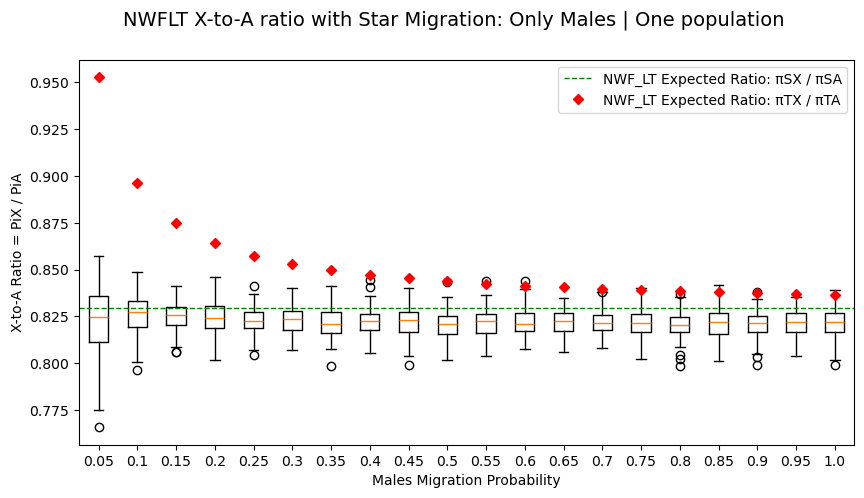

------------------------------------------------------------------------------------------------------------
Circle Migration



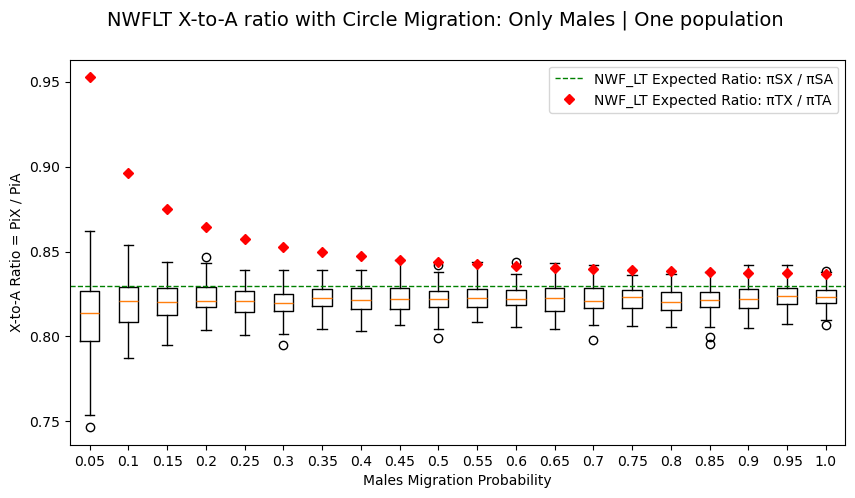

------------------------------------------------------------------------------------------------------------
StepStone Migration



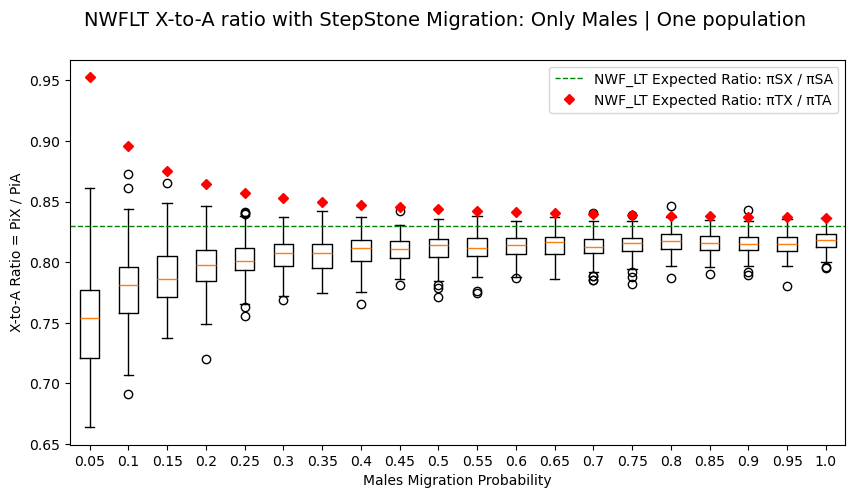

In [2]:
# Pi in one population
import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_LifeTable/Migrations/NWFLT_MigV2/"
FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWF_LifeTable/Migrations/"

Prob_Mig = [k/20 for k in range(1,20)]+[1.0]
LRatio_star = [0 for k in range (len(Prob_Mig))]
LRatio_circle = [0 for k in range (len(Prob_Mig))]
LRatio_stepstone = [0 for k in range (len(Prob_Mig))]
counter = 0
id_pop = 0 # 0 to 14


#Ne = 4*500*(1-SR)*SR   # Ne = 4*Nm*Nf/N  => Ne = 4*N*(1-SR)*SR 
#expected_teta = round (4*Ne*1.25e-8,10)
n = 15
NeA = 50
NeX = 3/4 * NeA
mu = 40 * 1.25e-8
Pi_SA = 0.0007692
Pi_SX = 0.0006381
L_PiTX_PiTA = []
expected_ratio = Pi_SX / Pi_SA

for pmig in Prob_Mig:
    mA = 0 + 1/2 * (pmig+0)
    mX = 0 + 1/3 * (pmig+2*0)
    Pi_TA = Pi_SA*(1+((n-1)**2)/(4*mA*NeA*n**2))
    Pi_TX = Pi_SX*(1+((n-1)**2)/(4*mX*NeX*n**2))
    PiTX_PiTA = Pi_TX / Pi_TA
    L_PiTX_PiTA.append(PiTX_PiTA)
    
    Star = []
    Circle = []
    StepStone = []
    for NUM in range(1,501):
        File = FOLDER+"NWLT_subpop_star_Mig"+str(pmig)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) > 0:
                Star.append(float(Values[(id_pop+0)*3+1])/float(Values[(id_pop+0)*3+0]))
            Text.close()
            
        File = FOLDER+"NWLT_subpop_circle_Mig"+str(pmig)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) > 0:
                Circle.append(float(Values[(id_pop+0)*3+1])/float(Values[(id_pop+0)*3+0]))
            Text.close()

        File = FOLDER+"NWFLT_MigV2_stepstone"+str(pmig)+","+str(NUM)+".txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) > 0:
                StepStone.append(float(Values[(id_pop+1)*3+1])/float(Values[(id_pop+1)*3+0]))
            Text.close()
    
    LRatio_star[counter] = Star
    LRatio_circle[counter] = Circle
    LRatio_stepstone[counter] = StepStone
    counter += 1
    Star_median = np.median(Star)
    Circle_median = np.median(Circle)
    StepStone_median = np.median(StepStone)
    #print("------------------------------------------------------------------------------------------------------------")
    #print("Migration Probability = "+str(pmig))
    #print("Expected Ratio: ",expected_ratio)
    #print("Expected Ratio with Subpopulations: ",round (PiTX_PiTA,3))
    #print()
    #print("Number of star simulations: ",len(Star))
    #print("Median Ratio: ",Star_median)
    #print()
    #print("Number of Circle simulations: ",len(Circle))
    #print("Median Ratio: ",Circle_median)
    #print()
    #print("Number of StepStone simulations: ",len(StepStone))
    #print("Median Ratio: ",StepStone_median)

print("------------------------------------------------------------------------------------------------------------")
print("Star Migration")
print()

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("NWFLT X-to-A ratio with Star Migration: Only Males | One population", fontsize=14)

ax.boxplot(LRatio_star,tick_labels=Prob_Mig)
ax.set_xlabel("Males Migration Probability")
ax.set_ylabel("X-to-A Ratio = PiX / PiA")
ax.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='NWF_LT Expected Ratio: πSX / πSA')
ax.plot([k for k in range (1,len(Prob_Mig)+1)], L_PiTX_PiTA, marker='D',linestyle='None', color='red', markersize=5, label='NWF_LT Expected Ratio: πTX / πTA')
ax.legend()

fig.savefig(FOLDER_output+'NWFLT_MigV2_star_1P.png') 
mp.show()


print("------------------------------------------------------------------------------------------------------------")
print("Circle Migration")
print()

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("NWFLT X-to-A ratio with Circle Migration: Only Males | One population", fontsize=14)

ax.boxplot(LRatio_circle,tick_labels=Prob_Mig)
ax.set_xlabel("Males Migration Probability")
ax.set_ylabel("X-to-A Ratio = PiX / PiA")
ax.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='NWF_LT Expected Ratio: πSX / πSA')
ax.plot([k for k in range (1,len(Prob_Mig)+1)], L_PiTX_PiTA, marker='D',linestyle='None', color='red', markersize=5, label='NWF_LT Expected Ratio: πTX / πTA')
ax.legend() 

fig.savefig(FOLDER_output+'NWFLT_MigV2_circle_1P.png') 
mp.show()

print("------------------------------------------------------------------------------------------------------------")
print("StepStone Migration")
print()

fig, ax = mp.subplots(figsize=(10, 5))
fig.suptitle("NWFLT X-to-A ratio with StepStone Migration: Only Males | One population", fontsize=14)

ax.boxplot(LRatio_stepstone,tick_labels=Prob_Mig)
ax.set_xlabel("Males Migration Probability")
ax.set_ylabel("X-to-A Ratio = PiX / PiA")
ax.axhline(y=expected_ratio, color='green', linestyle='--',linewidth=1, label='NWF_LT Expected Ratio: πSX / πSA')
ax.plot([k for k in range (1,len(Prob_Mig)+1)], L_PiTX_PiTA, marker='D',linestyle='None', color='red', markersize=5, label='NWF_LT Expected Ratio: πTX / πTA')
ax.legend() 

fig.savefig(FOLDER_output+'NWFLT_MigV2_stepstone_1P.png') 
mp.show()